# Tarea - Ajuste de curvas

María Fernanda Tirado Zamudio 14/09/2023

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [7]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

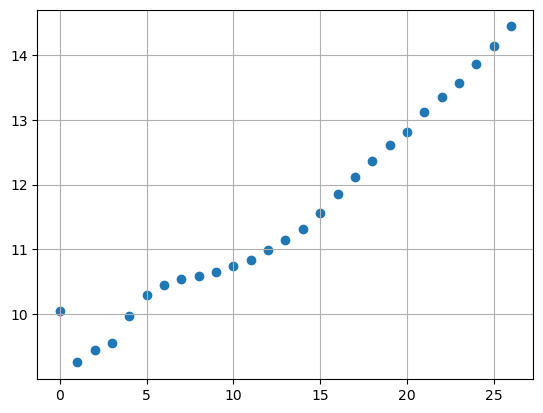

In [8]:
x = np.linspace(0,26,len(data))

plt.figure()
plt.scatter(x,data)
plt.grid()

In [9]:
def funcion_costo(beta, X, y, size):
    beta = np.reshape(beta,[size,-1]) 
    pred= X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo [0][0]

# Construyendo matrices X
ones = np.ones([len(data),1])
x_1 = np.reshape(x,[len(data),-1])
x_2 = np.reshape(x**2,[len(data),-1])
x_3 = np.reshape(x**3,[len(data),-1])

X1 = np.hstack((ones,x_1))
X2 = np.hstack((ones,x_1,x_2))
X3 = np.hstack((ones,x_1,x_2,x_3))

beta_inicial_1 = np.random.rand(2)
beta_inicial_2 = np.random.rand(3)
beta_inicial_3= np.random.rand(4)

y = np.reshape(data,[len(data),-1])

In [10]:
print("Grado 1:",funcion_costo(beta_inicial_1,X1,y,2))
print("Grado 2:",funcion_costo(beta_inicial_2,X2,y,3))
print("Grado 3:",funcion_costo(beta_inicial_3,X3,y,4))

Grado 1: 927.6828253891181
Grado 2: 1307810.40750649
Grado 3: 134566970.34609604


In [11]:
sol1 = opt.minimize(funcion_costo,beta_inicial_1,args=(X1,y,2))
sol1

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.3704889518152252
        x: [ 9.116e+00  1.867e-01]
      nit: 3
      jac: [-1.490e-07  3.368e-06]
 hess_inv: [[ 7.011e-02 -3.968e-03]
            [-3.968e-03  3.053e-04]]
     nfev: 15
     njev: 5

In [12]:
sol3 = opt.minimize(funcion_costo,beta_inicial_3,args=(X3,y,4))
sol3

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.8404230004281673
        x: [ 9.566e+00  8.522e-02  3.153e-03  3.167e-05]
      nit: 6
      jac: [-1.668e-02 -1.113e-01 -1.426e+00 -1.549e+01]
 hess_inv: [[ 2.272e-01 -6.411e-02  4.835e-03 -1.064e-04]
            [-6.411e-02  2.619e-02 -2.282e-03  5.431e-05]
            [ 4.835e-03 -2.282e-03  2.138e-04 -5.321e-06]
            [-1.064e-04  5.431e-05 -5.321e-06  1.364e-07]]
     nfev: 307
     njev: 59

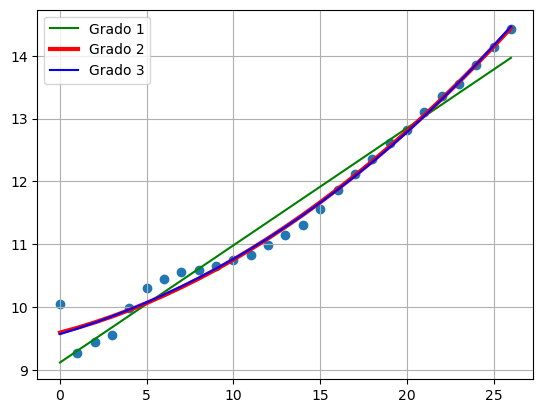

In [13]:
y_pred_1 = 9.11567699 + 0.18667052*x
y_pred_2 = 9.59128644e+00 + 7.25241290e-02*x + 4.39024717e-03*x**2
y_pred_3 = 9.56752339e+00 + 8.46505952e-02*x + 3.20195529e-03*x**2 + 3.04690690e-05*x**3

plt.figure()
plt.scatter(x,data)
plt.plot(x,y_pred_1,"g",label='Grado 1')
plt.plot(x,y_pred_2,"r",label='Grado 2',linewidth=3)
plt.plot(x,y_pred_3,"b",label='Grado 3')
plt.legend()
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [16]:
import pandas as pd
data=pd.read_csv("population_data.csv")
poblacion=np.array(data["Poblacion"])
print(poblacion)

[ 28296  29110  29980  30904  31880  32906  33978  35095  36253  37448
  38677  39939  41234  42564  43931  45339  46784  48264  49788  51361
  52988  54669  56396  58156  59931  61708  63486  65261  67013  68715
  70353  71916  73416  74880  76351  77859  79410  80999  82635  84327
  86077  87890  89758  91654  93542  95393  97202  98969 100679 102317
 103874 105340 106724 108056 109382 110732 112117 113530 114968 116423
 114255 115683 117054 118395 119713 121005]


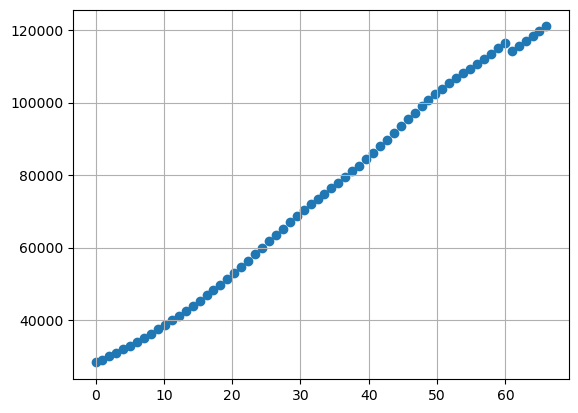

In [17]:
num = len(poblacion)
x = np.linspace(0,num,num)

plt.figure()
plt.scatter(x,poblacion)
plt.grid()

In [18]:
# Construyendo matrices X
ones = np.ones([num,1])
x_1 = np.reshape(x,[num,-1])
x_2 = np.reshape(x**2,[num,-1])
x_3 = np.reshape(x**3,[num,-1])

X1 = np.hstack((ones,x_1))
X2 = np.hstack((ones,x_1,x_2))
X3 = np.hstack((ones,x_1,x_2,x_3))

beta_inicial_1 = np.random.rand(2)
beta_inicial_2 = np.random.rand(3)
beta_inicial_3= np.random.rand(4)

y = np.reshape(poblacion,[num,-1])

In [19]:
print("Grado 1:",funcion_costo(beta_inicial_1,X1,y,2))
print("Grado 2:",funcion_costo(beta_inicial_2,X2,y,3))
print("Grado 3:",funcion_costo(beta_inicial_3,X3,y,4))

Grado 1: 421445543135.07495
Grado 2: 420086342544.28125
Grado 3: 128972542746.24817


In [20]:
sol1 = opt.minimize(funcion_costo,beta_inicial_1,args=(X1,y,2))
sol1

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 212137169.54433924
        x: [ 2.414e+04  1.521e+03]
      nit: 10
      jac: [ 0.000e+00  8.000e+00]
 hess_inv: [[ 3.485e-07 -5.734e-13]
            [-5.734e-13  4.411e-14]]
     nfev: 195
     njev: 64

In [21]:
sol2 = opt.minimize(funcion_costo,beta_inicial_2,args=(X2,y,3))
sol2

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 210941621.49786627
        x: [ 2.443e+04  1.494e+03  4.023e-01]
      nit: 8
      jac: [ 0.000e+00 -1.200e+01  6.000e+00]
 hess_inv: [[ 6.453e-02 -3.887e-03  4.875e-05]
            [-3.887e-03  3.171e-04 -4.494e-06]
            [ 4.875e-05 -4.494e-06  6.806e-08]]
     nfev: 151
     njev: 35

In [22]:
sol3 = opt.minimize(funcion_costo,beta_inicial_3,args=(X3,y,4))
sol3

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 25240442.643181734
        x: [ 2.848e+04  7.279e+02  2.965e+01 -2.954e-01]
      nit: 8
      jac: [ 0.000e+00  1.500e+00 -1.325e+01 -6.750e+00]
 hess_inv: [[ 1.161e-01 -1.348e-02  4.116e-04 -3.644e-06]
            [-1.348e-02  2.105e-03 -7.213e-05  6.793e-07]
            [ 4.116e-04 -7.213e-05  2.627e-06 -2.571e-08]
            [-3.644e-06  6.793e-07 -2.571e-08  2.583e-10]]
     nfev: 246
     njev: 47

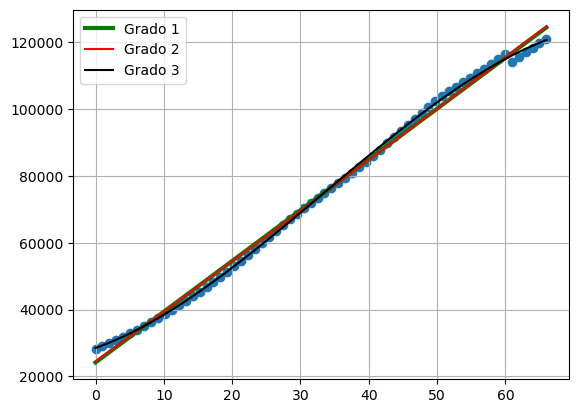

In [23]:
y_pred_1 = 24138.02647302 + 1520.57963288*x
y_pred_2 = 2.44255665e+04 + 1.49402932e+03*x + 4.02286037e-01*x**2
y_pred_3 = 2.84777249e+04 + 7.27885869e+02*x + 2.96455154e+01*x**2 - 2.95386224e-01*x**3

plt.figure()
plt.scatter(x,poblacion)
plt.plot(x,y_pred_1,"g",label='Grado 1',linewidth=3)
plt.plot(x,y_pred_2,"r",label='Grado 2')
plt.plot(x,y_pred_3,"k",label='Grado 3')
plt.legend()
plt.grid()

In [24]:
nacimientos=np.array(data["Nacimientos"])
print(nacimientos)

[1174947 1183788 1195209 1261775 1339837 1377917 1427722 1485202 1447578
 1589606 1608174 1647006 1705481 1756624 1849408 1888171 1954340 1981363
 2058251 2037561 2132630 2231399 2346002 2572287 2522580 2254497 2366305
 2379327 2346862 2274267 2446238 2530662 2392849 2609088 2511894 2655671
 2577045 2794390 2622031 2620262 2735312 2756447 2797397 2839686 2904389
 2750444 2707718 2698425 2668429 2769089 2798339 2767610 2699084 2655894
 2625056 2567906 2505939 2655083 2636110 2577214 2643908 2586287 2498880
 2478889 2463420 2353596]


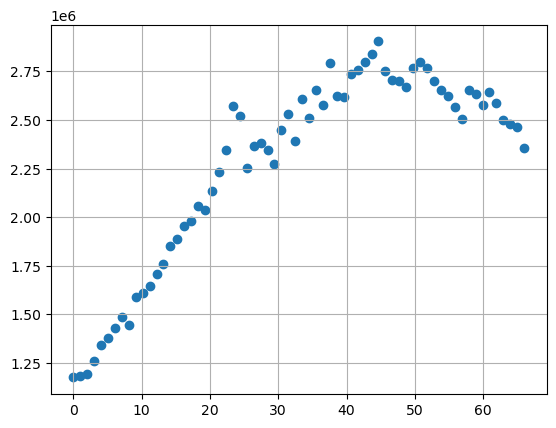

In [25]:
num = len(nacimientos)
x = np.linspace(0,num,num)

plt.figure()
plt.scatter(x,nacimientos)
plt.grid()

In [27]:
# Construyendo matrices X
ones = np.ones([num,1])
x_1 = np.reshape(x,[num,-1])
x_2 = np.reshape(x**2,[num,-1])
x_3 = np.reshape(x**3,[num,-1])

X1 = np.hstack((ones,x_1))
X2 = np.hstack((ones,x_1,x_2))
X3 = np.hstack((ones,x_1,x_2,x_3))

beta_inicial_1 = np.random.rand(2)
beta_inicial_2 = np.random.rand(3)
beta_inicial_3= np.random.rand(4)

y = np.reshape(nacimientos,[num,-1])

In [28]:
print("Grado 1:",funcion_costo(beta_inicial_1,X1,y,2))
print("Grado 2:",funcion_costo(beta_inicial_2,X2,y,3))
print("Grado 3:",funcion_costo(beta_inicial_3,X3,y,4))

Grado 1: 358558203375225.94
Grado 2: 358446666098864.0
Grado 3: 335666409976020.9


In [29]:
sol1 = opt.minimize(funcion_costo,beta_inicial_1,args=(X1,y,2))
sol1

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 4737962669118.754
        x: [ 1.561e+06  2.168e+04]
      nit: 5
      jac: [ 0.000e+00 -5.243e+05]
 hess_inv: [[ 7.596e-03 -1.378e-15]
            [-1.378e-15  4.153e-17]]
     nfev: 75
     njev: 25

In [30]:
sol2 = opt.minimize(funcion_costo,beta_inicial_2,args=(X2,y,3))
sol2

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 492921061800.12
        x: [ 1.021e+06  7.167e+04 -7.580e+02]
      nit: 7
      jac: [ 0.000e+00  2.048e+04  3.277e+04]
 hess_inv: [[ 6.202e-02 -3.678e-03  4.577e-05]
            [-3.678e-03  3.010e-04 -4.271e-06]
            [ 4.577e-05 -4.271e-06  6.498e-08]]
     nfev: 208
     njev: 49

In [31]:
sol3 = opt.minimize(funcion_costo,beta_inicial_3,args=(X3,y,4))
sol3

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 441782320152.0958
        x: [ 1.088e+06  5.896e+04 -2.728e+02 -4.902e+00]
      nit: 10
      jac: [ 0.000e+00  0.000e+00  2.212e+05  1.084e+07]
 hess_inv: [[ 7.034e-02 -5.365e-03  1.246e-04 -8.992e-07]
            [-5.365e-03  8.293e-04 -2.849e-05  2.692e-07]
            [ 1.246e-04 -2.849e-05  1.149e-06 -1.189e-08]
            [-8.992e-07  2.692e-07 -1.189e-08  1.295e-10]]
     nfev: 407
     njev: 79

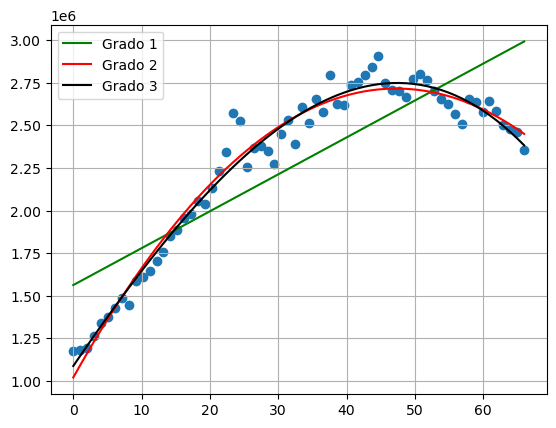

In [32]:
y_pred_1 = 1562990.99542582 + 21643.59351408*x
y_pred_2 = 1.02113758e+06 + 7.16723856e+04*x - 7.58015620e+02*x**2
y_pred_3 = 1.08834110e+06 + 5.89563736e+04*x - 2.72532610e+02*x**2 - 4.90448023e+00*x**3

plt.figure()
plt.scatter(x,nacimientos)
plt.plot(x,y_pred_1,"g",label='Grado 1')
plt.plot(x,y_pred_2,"r",label='Grado 2')
plt.plot(x,y_pred_3,"k",label='Grado 3')
plt.legend()
plt.grid()